# Analysis of the CaK. line
flare 6/9/2017

Remark that there are two flares here 

# start with flare of 11:55:47 

In [1]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi as un

E:\solar flares/data/2017-09-06\use_nessi.py:309: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi.py:979: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="fitting Nessi to sst data ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi.py:1729: SyntaxWarning: invalid escape sequence '\D'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
E:\solar flares/data/2017-09-06\use_nessi.py:1729: SyntaxWarning: invalid escape sequence '\A'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
E:\solar flares/data/2017-09-06\use_nessi.py:1982: SyntaxWarning: invalid escape sequence '\s'
  return "E:\solar

In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


# functies uittesten met CaK

In [3]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s


In [4]:
reload(un)
# And now the running commands
openfile="nb_3950_2019-05-06T08_34_01_scans=0-452_corrected_im.fits"
header= f.getheader(un.get_file_path_fits(openfile))
header = add_enters(str(header), length_row=79)

print(header)
# np.savetxt('headerCaK19.txt', header)

with open('headers/headerCaK19.txt', 'w') as file:
    file.write(header)




SIMPLE  =                    T / Written by IDL:  Thu Nov 14 15:27:18 2019     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1888 / Number of positions along axis 1              
 NAXIS2  =                 1236 / Number of positions along axis 2              
 NAXIS3  =                   28 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                  453 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 TIMESYS = 'UTC     '           /                                               
 DATE    = '2019-11-15T11:56:04' / Creation UTC date of FITS header             
 VAR_KEYS= 'VAR-EXT-DATE-BEG;DATE-BEG,VAR-EXT-DATE-END;DATE-END,VAR-EXT-DATE-AV&
'CONTINUE  'G;DATE-AVG,VAR-EX

for the spectral positions of the data: see harps paper! We calculate these here:

In [5]:
peak = 3933.663
D = np.array([-1.00, -0.85, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.07, 0, 0.07, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.85, 1.00, 0 ])
wavl = D+peak
wavl[-1] = 4000
np.save('spectfile3950_.npy', wavl)
wavl, np.shape(wavl)

(array([3932.663, 3932.813, 3933.013, 3933.113, 3933.213, 3933.313,
        3933.413, 3933.513, 3933.593, 3933.663, 3933.733, 3933.813,
        3933.913, 3934.013, 3934.113, 3934.213, 3934.313, 3934.513,
        3934.663, 4000.   ]),
 (20,))

The time series are also not yet given. Calcultate them from: 
START+'2017-09-06T11:56:28.03739' END= '2017-09-06T12:39:22.07020' in units [minutes]

the found wavelengts by solarnet where 

 [393.219216 393.252048 393.278192 393.304944 393.31148  393.318016
 393.324552 393.330936 393.337472 393.344008 393.350544 393.356928
 393.363464 393.37     393.376536 393.383072 393.389456 393.395992
 393.402528 393.409064 393.415448 393.421984 393.42852  393.435056
 393.461808 393.487952 393.520784 400.114744]
Use arguments as dictionary with 'frames_of_overlap' to define a list of considerd frames to calculate overlap
calculated boundary at frame 0
calculated boundary at frame 17
calculated boundary at frame 34
calculated boundary at frame 51
calculated boundary at frame 68
calculated boundary at frame 85
calculated boundary at frame 102
calculated boundary at frame 119
calculated boundary at frame 136
calculated boundary at frame 153
calculated boundary at frame 170
calculated boundary at frame 187
calculated boundary at frame 204
calculated boundary at frame 221
calculated boundary at frame 238
calculated boundary at frame 255
calculated boundary at frame 272
calculated boundary 

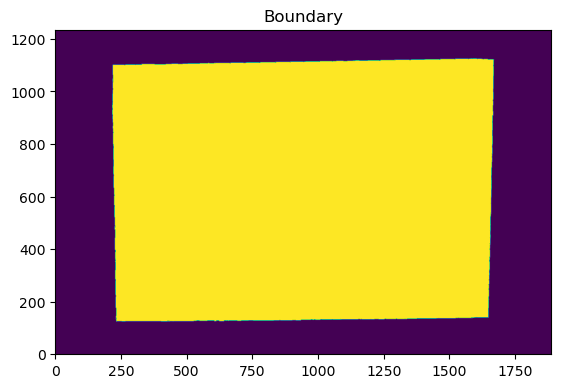

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([3932.19216002, 3932.52048001, 3932.78192001, 3933.04944001,
       3933.11480001, 3933.18016001, 3933.24552001, 3933.30936   ,
       3933.37472   , 3933.44008   , 3933.50544   , 3933.56928   ,
       3933.63464   , 3933.7       , 3933.76536   , 3933.83072   ,
       3933.89456   , 3933.95992   , 3934.02528   , 3934.09064   ,
       3934.15447999, 3934.21983999, 3934.28519999, 3934.35055999,
       3934.61807999, 3934.87951999, 3935.20783998, 4001.14743998])

In [6]:
reload(un)
arguments = {'frames_of_overlap':[i for i in range(0,440,17)]}
CaK= un.SST_data('nb_3950_2019-05-06T08_34_01_scans=0-452_corrected_im.fits',
                   'use_solarnet','use_solarnet',name_of_line='CaK19', thresh=[2e-7, 5e-5], boundary_methode='search_overlap',
                   boundary_arguments=arguments
                   )
CaK._wavel = CaK._wavel * 10 # which were in nm
CaK.line_lim = (3932.1, 3935.3)
CaK._wavel

[[4.166666666666667, 3.5], [13.5, 3.5], [22.833333333333332, 3.5]] 28


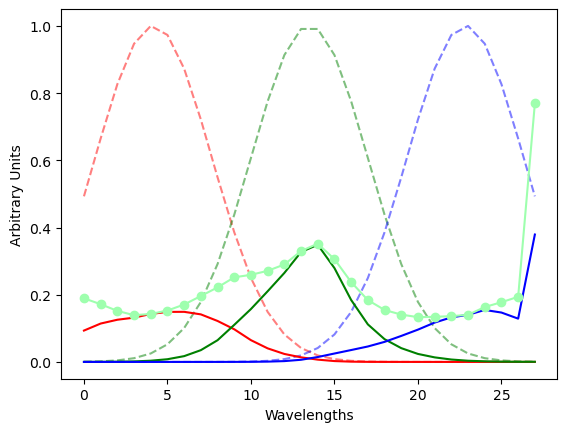

In [7]:
# %matplotlib inline
Meansd = un.guess_filters(len(CaK._wavel))
print(Meansd, len(CaK._wavel))
CaK.update_filters(Meansd)
CaK.plot_filt(880,900)

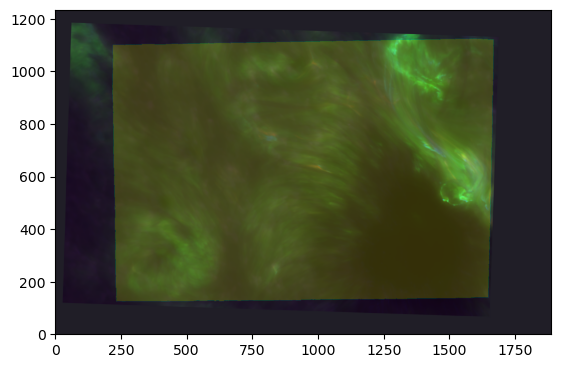

(1236, 1888, 3)


In [8]:
CaK.ccp_frame(70,Show=False)
plt.imshow(CaK.current_ccp,origin='lower')

plt.imshow(CaK.boundary,origin='lower', alpha=0.2)
plt.show()
print(np.shape(CaK.current_ccp))#@,np.shape(CaK.Boundary,origin='lower'))

COCOPLOT at  t=08:34:05 UT (frame number 0 )


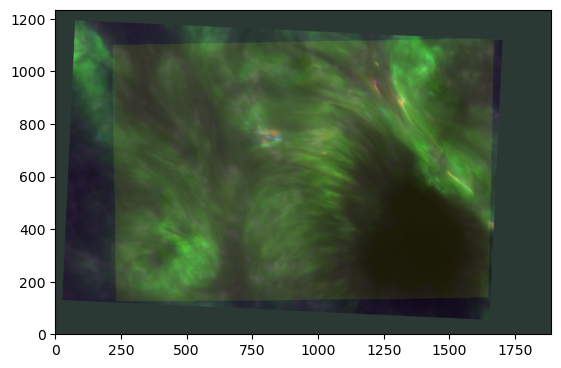

COCOPLOT at  t=08:44:32 UT (frame number 80 )


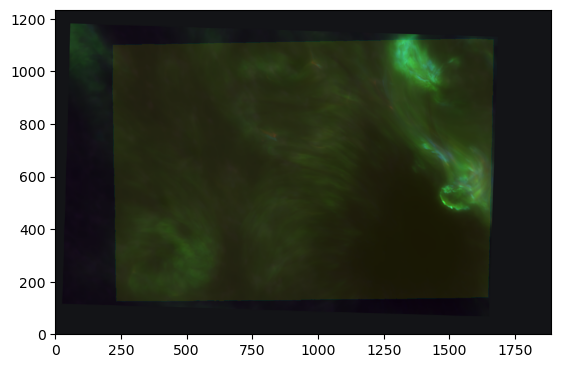

COCOPLOT at  t=08:54:59 UT (frame number 160 )


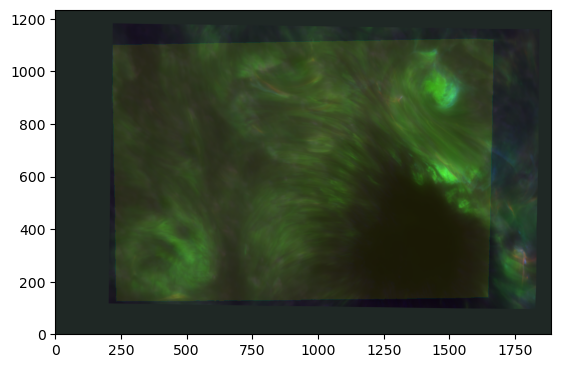

COCOPLOT at  t=09:05:27 UT (frame number 240 )


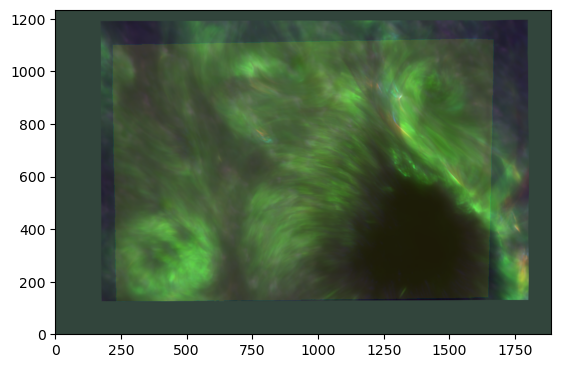

COCOPLOT at  t=09:15:53 UT (frame number 320 )


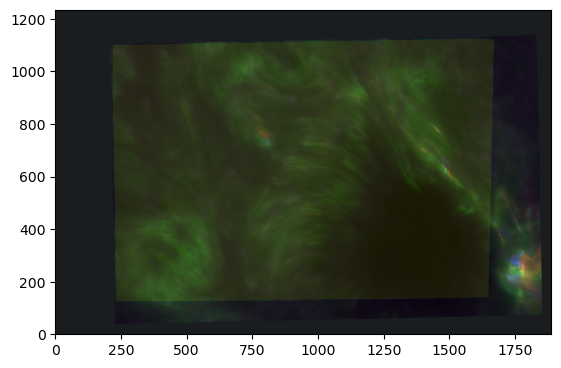

COCOPLOT at  t=09:26:19 UT (frame number 400 )


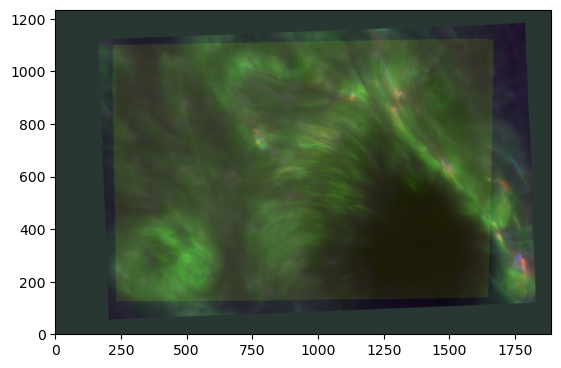

In [9]:
# Many COCOPLOTS
r = CaK._number_of_frames
for i in range(0,r,80):
    # try:
    #     print(CaK._time[i], CaK._time)
    # except IndexError:
    #     print(f"the timeframe is not long enough. index {i} out of bounds for time with len {len(CaK._time)}")
    tstr = CaK.time_of_frame(i)
    print("COCOPLOT at ", tstr, "(frame number", i,")")
    CaK.ccp_frame(i,Show=False)
    plt.imshow(CaK.current_ccp,origin='lower')

    plt.imshow(CaK.boundary,origin='lower', alpha=0.1)
    plt.show()


In [10]:
def check_scalar_not_nan(sst_data):
    if hasattr(CaK, 'scalar'):
        if np.isnan(CaK.scalar):
            print('This is a problem. The CaK.scalar is nan.')
            # A scalar which will normalize the intensity
            CaK.scalar = 0
            CaK.scalar = CaK.frame_integrated_spect(0)[0]
            if np.isnan(CaK.scalar):
                print('The problem is not fixed by renormalization.\nMake sure no other constants are nan in the definition of the scalar')
                if hasattr(CaK,'correction'):
                    print('the correction', CaK.correction )

    else:
        CaK.frame_integrated_spect(0)
        CaK.check_scalar_not_nan

check_scalar_not_nan(CaK)

np.shape(CaK.datacube)

(453, 1, 28, 1236, 1888)

[0.84305963 0.75137201 0.67501685 0.62471674 0.63253616 0.66580524
 0.73469876 0.85761089 1.03972075 1.24353308 1.39029943 1.42980485
 1.42396129 1.44955448 1.47911046 1.39437245 1.20162121 0.98780782
 0.82093736 0.71668002 0.66133316 0.63821704 0.63281619 0.63866053
 0.70897363 0.79242859 0.85711985 3.75332336]


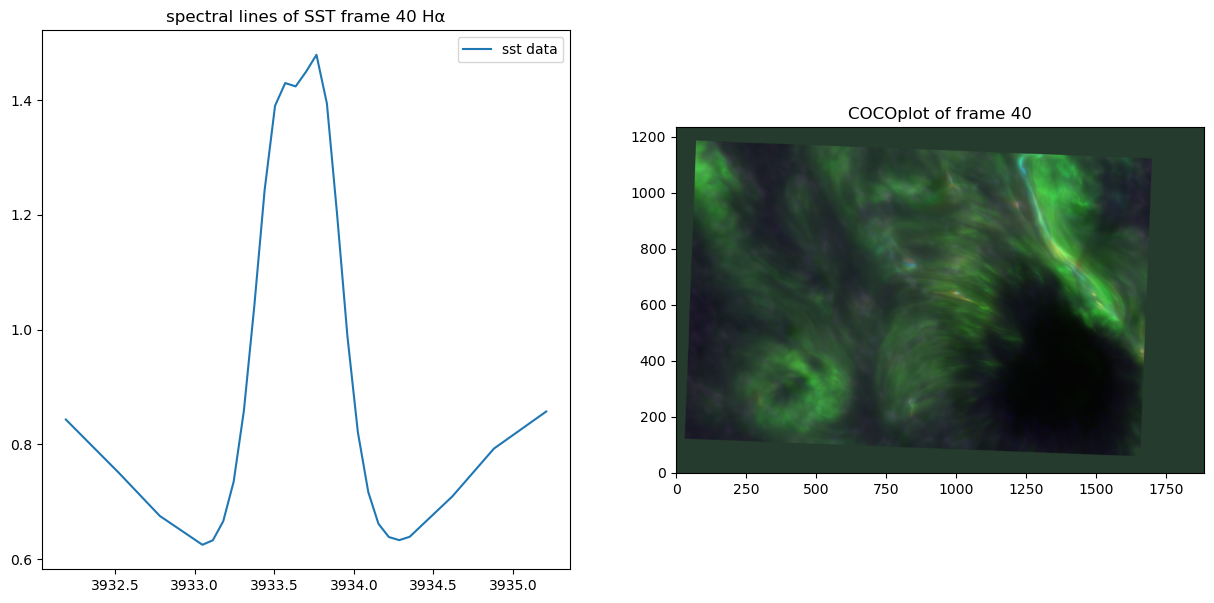

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
CaK.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
CaK.frame_integrated_spect(frame)
print(CaK.av_spect)
ax[0].plot(CaK._wavel[:-1], CaK.av_spect[:-1], label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(CaK.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

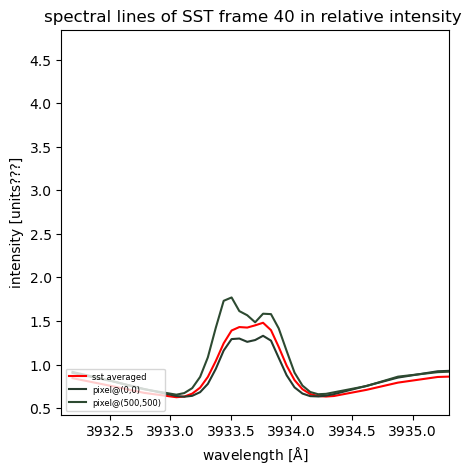

In [12]:
CaK.current_ccp[0:30:10,0:60:20,:]
# CaK.define_point_at_continuum(-1)
CaK.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

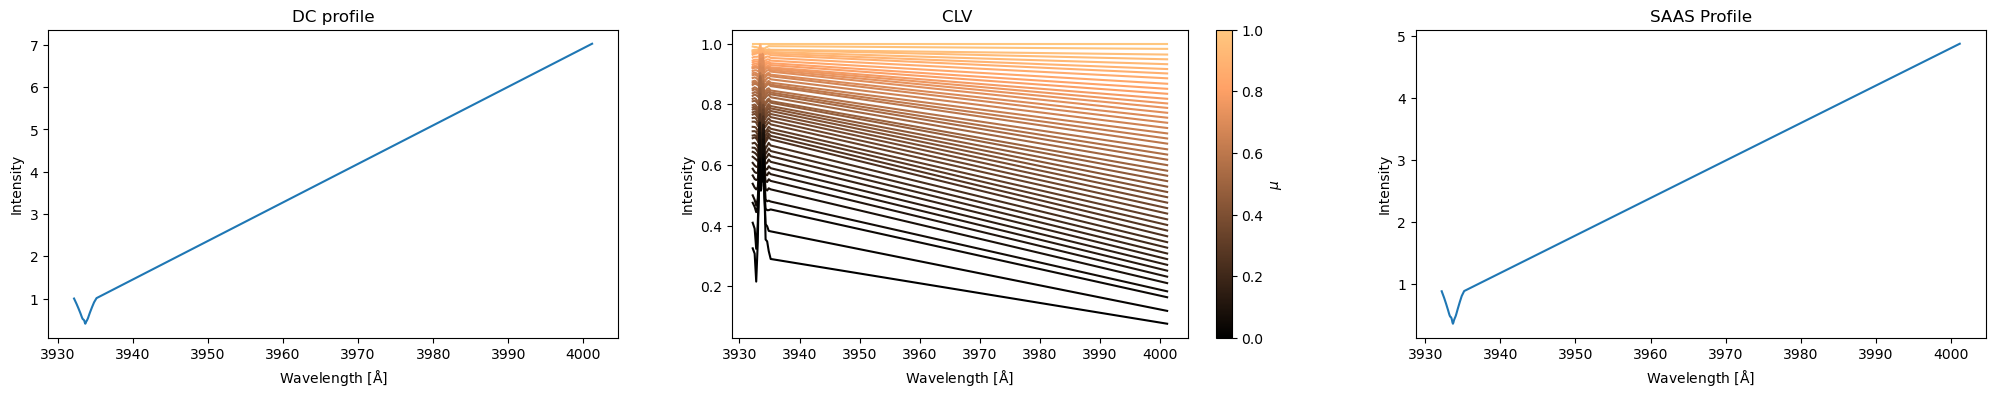

3933.7251200421415 [3932.19676006 3932.52204006 3932.78196005 3933.04188005 3933.10724005
 3933.17260005 3933.23796005 3933.30180005 3933.36716005 3933.43252005
 3933.49788004 3933.56172004 3933.62708004 3933.69244004 3933.75780004
 3933.82316004 3933.88700004 3933.95236004 3934.01772004 3934.08308004
 3934.14692004 3934.21228004 3934.27764004 3934.34300003 3934.60292003
 3934.86284003 3935.18812002 4001.14743998] [[1.         0.87620153 0.76842093 ... 0.91159718 1.00986771 7.02642874]
 [0.99070422 0.86673757 0.75995494 ... 0.90441404 1.00158354 6.90696614]
 [0.97648119 0.85636997 0.74948236 ... 0.89316074 0.98976455 6.77536039]
 ...
 [0.47531055 0.4044703  0.34149005 ... 0.41114552 0.45777378 1.1500991 ]
 [0.40946949 0.34169658 0.24846519 ... 0.34877113 0.38476981 0.83355861]
 [0.32502657 0.2695266  0.16539272 ... 0.28802065 0.29277341 0.53603683]]


In [13]:
reload(un)
import use_nessi3 as un3
theor_line = un3.linestudier('final_3934.npy', atlas=None, nr=101, neglect_atlas=True)
# theor_line.saas_profile_atlas_check(show_all=True)
print(np.median(theor_line.sst_wav), (theor_line.sst_wav), theor_line.sst_int)


## Calculating the mu !!!!! 

(453, 1, 28, 1236, 1888)
The frame is centered at (-716.921986496582, 186.15625469630433)
[-749.925986496582, -683.917986496582, 154.51385469630432, 217.79865469630434]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.6350960388134341 for timeframe 0
succesfully saved.
The frame is centered at (-716.921986496582, 186.15625469630433)
[-749.925986496582, -683.917986496582, 154.51385469630432, 217.79865469630434]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.6350960388134341 for timeframe 170
We take average mu to be  0.6350960388134341
Mu also set to the theoretic nessi line.


(0.6350960388134341, array([18], dtype=int64))

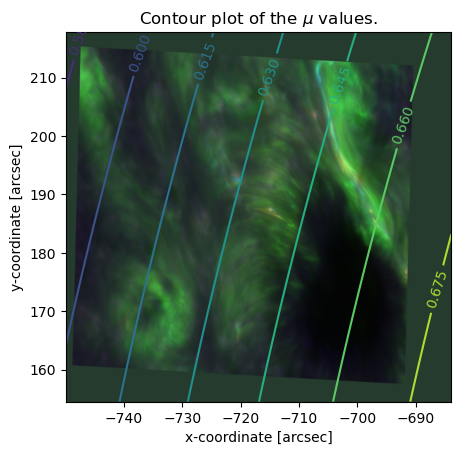

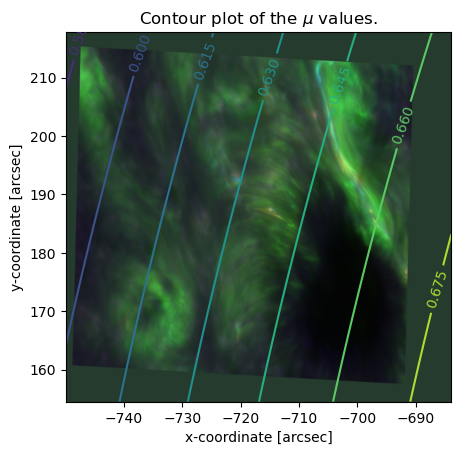

In [14]:
reload(un)
print(np.shape(CaK.datacube))
mu = CaK.set_mu(theor_line, number_of_last_frame=170, alternative_filename="fits/nb_8542_2019-05-06T08_33_15_scans=0-170_stokes_corrected_im.fits")
x = np.abs(theor_line.sst_mu-mu)
index_mu = np.where(x == np.min(x))[0]
mu, index_mu

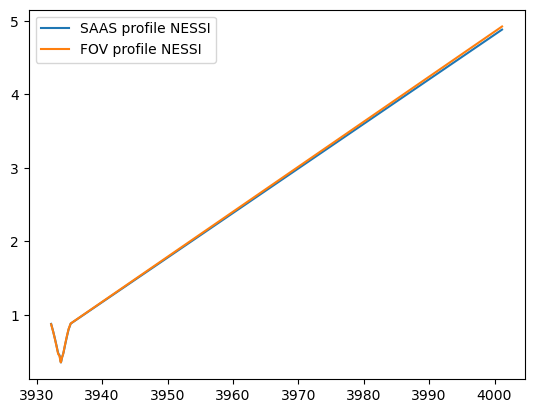

In [15]:

theor_line.set_fov( CaK.xx, CaK.yy, CaK.boundary, sr=959.63)

## Finding a suitable quiet sun patch
# In this case there doesn't realy exists a goed so we use the point at the continuum

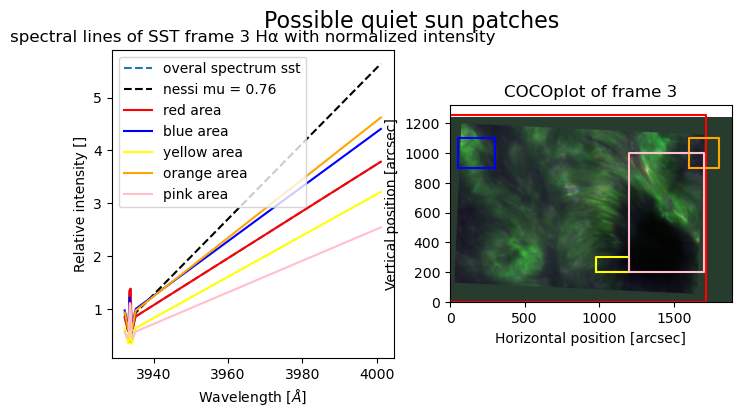

In [16]:
X = [ [(0,1712), (0, 1257 ) ],[(50,300), (900, 1100)], [(980, 1200), (200, 300)] , [(1600, 1800), (900,1100) ], [(1200,1700), (200, 1000) ]]# max y: 1258, x: 1713
# %matplotlib widget
# %matplotlib inline
frame = 3

CaK.possible_quiet_sun_patches(frame, theor_line , X=X)

## Finding a suitable quiet sun patch
# In this case there doesn't realy exists a goed so we use the point at the continuum

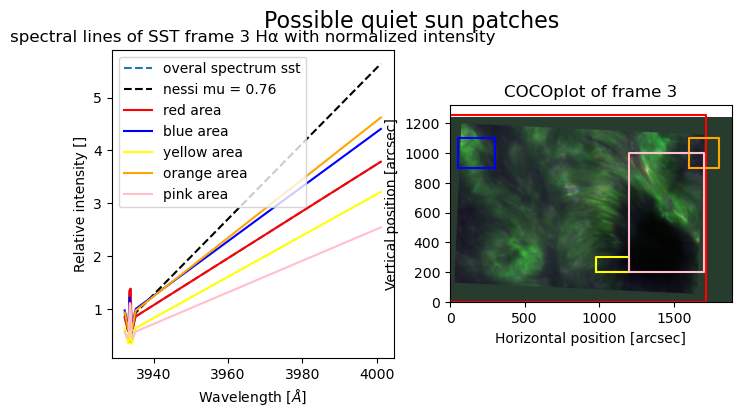

In [17]:
X = [ [(0,1712), (0, 1257 ) ],[(50,300), (900, 1100)], [(980, 1200), (200, 300)] , [(1600, 1800), (900,1100) ], [(1200,1700), (200, 1000) ]]# max y: 1258, x: 1713
# %matplotlib widget
# %matplotlib inline
frame = 3

CaK.possible_quiet_sun_patches(frame, theor_line , X=X)


### Which quiet sun?

fill in here which color the wanted quiet sun patch had 

In [18]:
color_wanted_patch = 'orange'

the edges of the patch are denoted by the xlim: (1600, 1800) and ylim: (900, 1100)


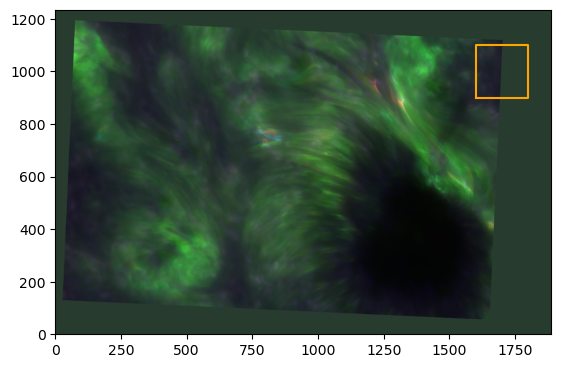

The quiet sun is pick at x (-690.4768100259939, 205.73098635622335) with average              mu 0.6605482402042397
[[-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]
 [-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]
 [-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]
 ...
 [-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]
 [-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]
 [-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]] [[0.20907259 0.20907259 0.20907259 ... 0.20907259 0.20907259 0.20907259]
 [0.20912599 0.20912599 0.20912599 ... 0.20912599 0.20912599 0.20912599]
 [0.20917939 0.20917939 0.20917939 ... 0.20917939 0.20917939 0.20917939]
 ...
 [0.21959209 0.21959209 0.21959209 ... 0.21959209 0.21959209 0.21959209]
 [0.21964549 0.21964549 0.21964549 ... 0.21964549 0.21964549 0.21964549]
 [0.21969888 0.2196988

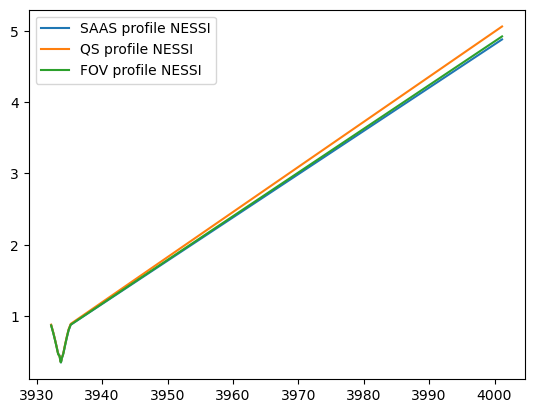

{'frame': 3, 'xlim': (1600, 1800), 'ylim': (900, 1100), 'color': 'orange'}

In [19]:
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']
ind = colors.index(color_wanted_patch)

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaK.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_line.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaK.quiet_sun

the theta fit is  [0, 0, 0.9117317311081086]


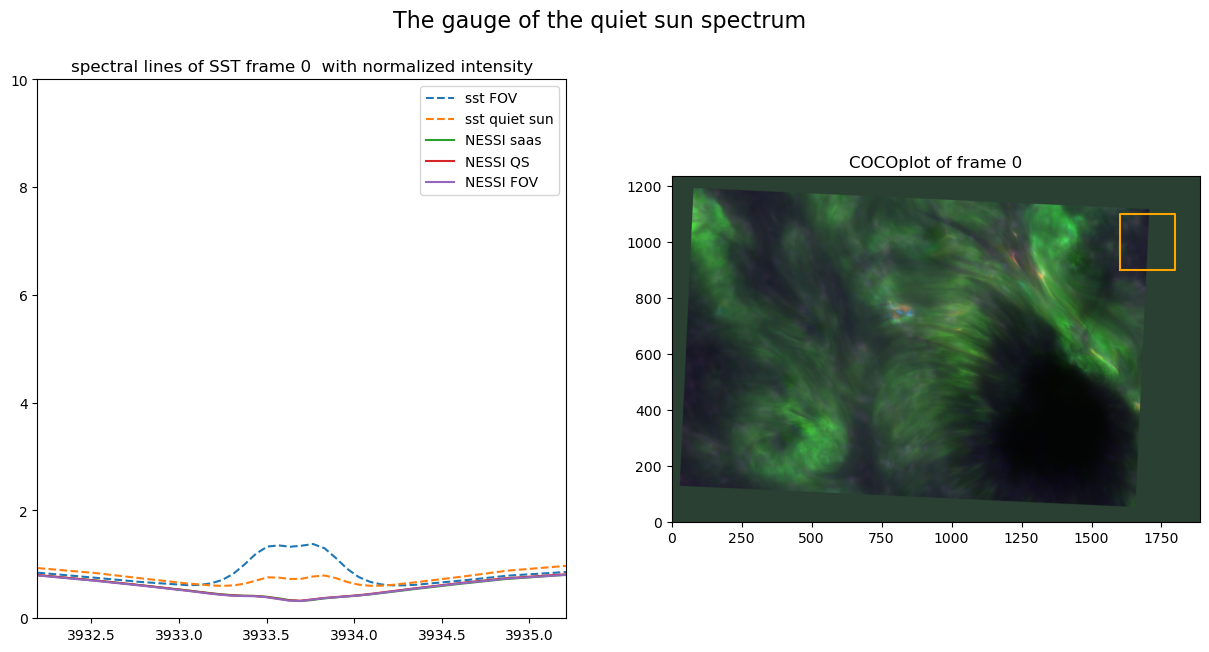

In [20]:
reload(un3)
un3.fit_qs_to_NESSI_cont_point(theor_line, CaK, xshift=0)


### Which quiet sun?

fill in here which color the wanted quiet sun patch had 

In [21]:
color_wanted_patch = 'orange'

the edges of the patch are denoted by the xlim: (1600, 1800) and ylim: (900, 1100)


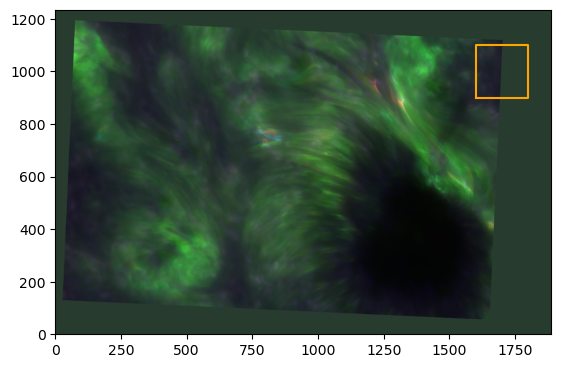

The quiet sun is pick at x (-690.4768100259939, 205.73098635622335) with average              mu 0.6605482402042397
[[-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]
 [-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]
 [-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]
 ...
 [-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]
 [-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]
 [-0.72315096 -0.72311451 -0.72307806 ... -0.71596993 -0.71593348
  -0.71589702]] [[0.20907259 0.20907259 0.20907259 ... 0.20907259 0.20907259 0.20907259]
 [0.20912599 0.20912599 0.20912599 ... 0.20912599 0.20912599 0.20912599]
 [0.20917939 0.20917939 0.20917939 ... 0.20917939 0.20917939 0.20917939]
 ...
 [0.21959209 0.21959209 0.21959209 ... 0.21959209 0.21959209 0.21959209]
 [0.21964549 0.21964549 0.21964549 ... 0.21964549 0.21964549 0.21964549]
 [0.21969888 0.2196988

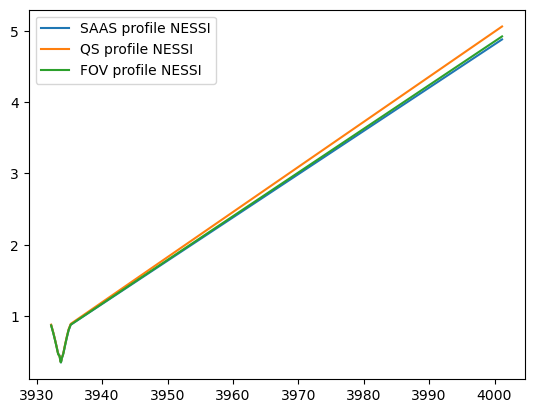

{'frame': 3, 'xlim': (1600, 1800), 'ylim': (900, 1100), 'color': 'orange'}

In [22]:
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']
ind = colors.index(color_wanted_patch)

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaK.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_line.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaK.quiet_sun

the theta fit is  [0, 0, 0.9117317311081086]


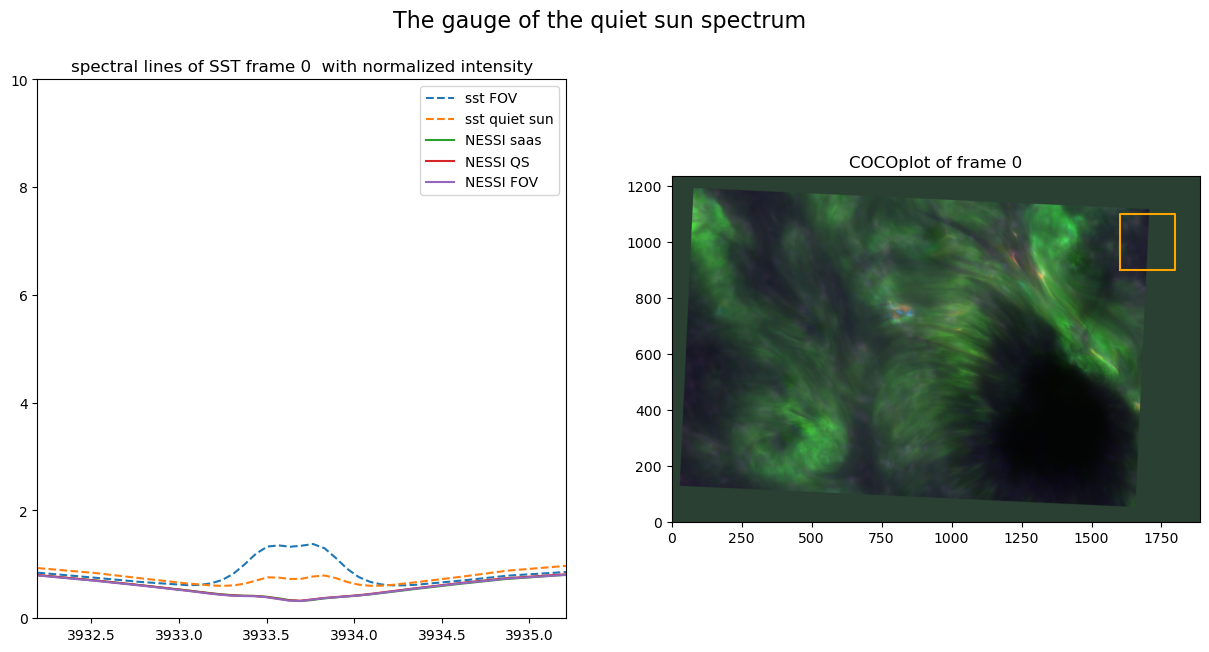

In [23]:
reload(un3)
un3.fit_qs_to_NESSI_cont_point(theor_line, CaK, xshift=0)

In [24]:
CaK.calculate__FOV_spect_over_time()
un.get_TIME(CaK)

array([ 0.        ,  0.13333333,  0.26666667,  0.4       ,  0.53333333,
        0.66666667,  0.8       ,  0.91666667,  1.05      ,  1.18333333,
        1.31666667,  1.45      ,  1.56666667,  1.7       ,  1.83333333,
        1.96666667,  2.1       ,  2.23333333,  2.36666667,  2.48333333,
        2.61666667,  2.75      ,  2.88333333,  3.01666667,  3.13333333,
        3.26666667,  3.4       ,  3.53333333,  3.66666667,  3.8       ,
        3.93333333,  4.05      ,  4.18333333,  4.31666667,  4.45      ,
        4.56666667,  4.7       ,  4.83333333,  4.96666667,  5.1       ,
        5.23333333,  5.35      ,  5.48333333,  5.61666667,  5.75      ,
        5.88333333,  6.        ,  6.13333333,  6.26666667,  6.4       ,
        6.51666667,  6.65      ,  6.78333333,  6.91666667,  7.05      ,
        7.18333333,  7.31666667,  7.43333333,  7.56666667,  7.7       ,
        7.83333333,  7.96666667,  8.1       ,  8.21666667,  8.35      ,
        8.48333333,  8.63333333,  8.75      ,  8.88333333,  9.01

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [138] at time t=['08:52:07 UT.
The areafactor for THIS flare is 0.0008737349680403056 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 70.22%.


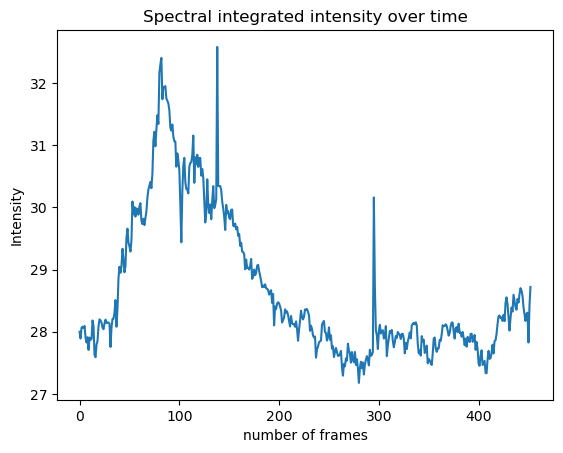

In [25]:
un.save_for_further_analysis(CaK, theor_line)


# Movie Making

Intensity limit calculation for first time.
Intensity limit is saved.
frame: 0, 08:34:05.827440, total number of frames: 453 


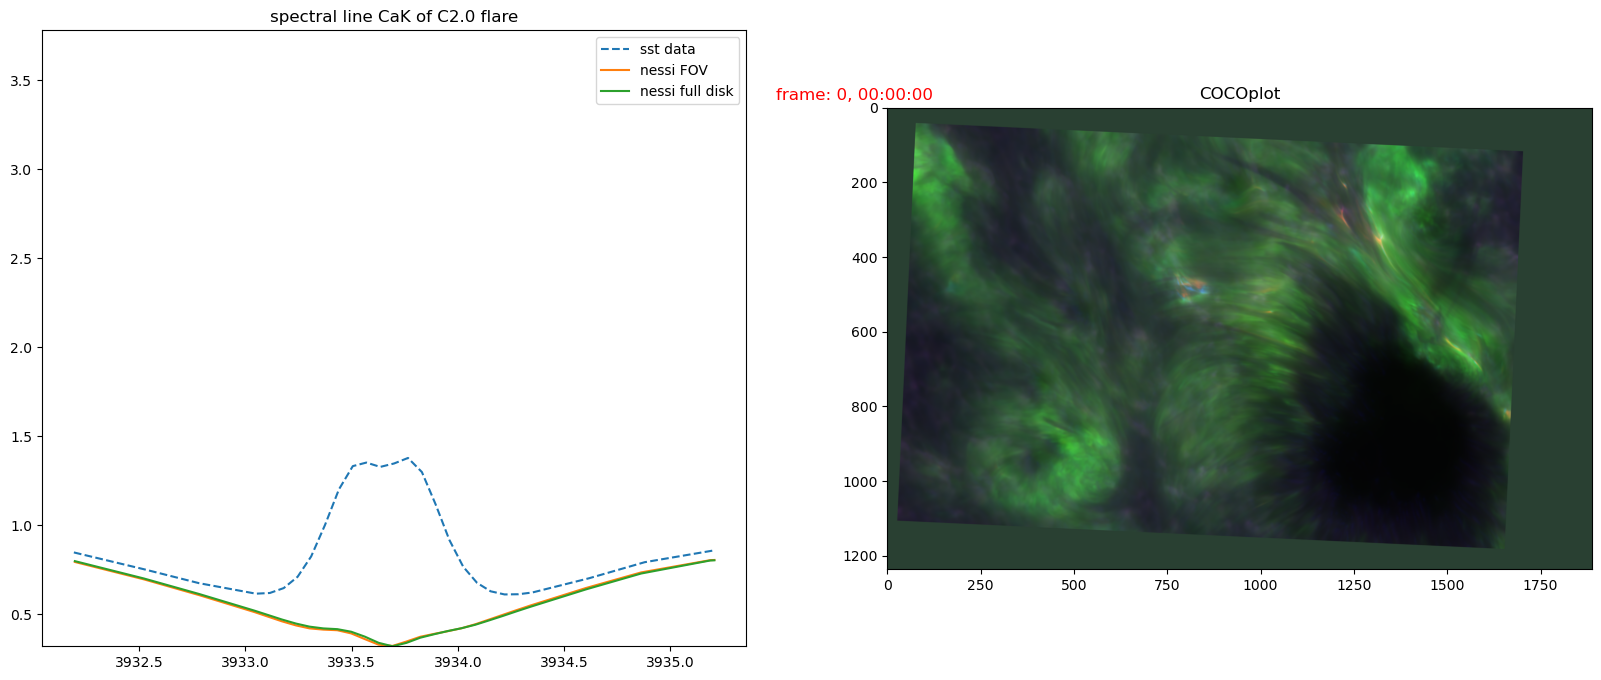

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 

In [26]:
# fill in here all arguments
theor_line = theor_line
sst_data = CaK
name_of_flare = "C2.0"
name_of_line = "CaK"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)